In [11]:
import numpy as np
import h5py 
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
pip install seaborn


     |████████████████████████████████| 292 kB 19.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
import configs

In [2]:
import os 
fg_files = os.listdir('/mnt/smb/locker/abbott-locker/hcnn/activations_pnet/fg')

In [14]:
print(files)

['133257.2.hdf5', '1808.3.hdf5', '167719.4.hdf5', '1807.2.hdf5', '309590.0.hdf5', '1804.3.hdf5', '146719.0.hdf5', '232351.2.hdf5', '54361.0.hdf5', '232351.1.hdf5', '159392.0.hdf5', '159731.4.hdf5', '1803.2.hdf5', '1810.0.hdf5', '19238.2.hdf5', '167719.2.hdf5', '156304.2.hdf5', '208776.3.hdf5', '157156.2.hdf5', '1811.4.hdf5', '157156.1.hdf5', '208776.2.hdf5', '103983.3.hdf5', '5795.0.hdf5', '146819.0.hdf5', '1804.1.hdf5', '1804.2.hdf5', '310578.0.hdf5', '157156.0.hdf5', '102960.2.hdf5', '1803.1.hdf5', '156304.1.hdf5', '137285.2.hdf5', '167720.1.hdf5', '156304.0.hdf5', '167720.0.hdf5', '208775.0.hdf5', '232351.0.hdf5', '103983.1.hdf5', '297433.4.hdf5', '102961.4.hdf5', '167719.0.hdf5', '1808.0.hdf5', '1808.1.hdf5', '157155.1.hdf5', '167720.3.hdf5', '54474.0.hdf5', '54360.0.hdf5', '146431.0.hdf5', '134039.0.hdf5', '297433.2.hdf5', '2333.2.hdf5', '167720.4.hdf5', '1807.0.hdf5', '19238.4.hdf5', '167719.1.hdf5', '1803.0.hdf5', '134039.3.hdf5', '141697.2.hdf5', '208775.2.hdf5', '309589.0.hdf5

In [15]:
bg_files = os.listdir('/mnt/smb/locker/abbott-locker/hcnn/activations_pnet/bg_july22')

In [16]:
print(bg_files)

['133257.2.hdf5', '1808.3.hdf5', '167719.4.hdf5', '1807.2.hdf5', '309590.0.hdf5', '1804.3.hdf5', '146719.0.hdf5', '232351.2.hdf5', '54361.0.hdf5', '232351.1.hdf5', '159392.0.hdf5', '159731.4.hdf5', '1803.2.hdf5', '1810.0.hdf5', '19238.2.hdf5', '167719.2.hdf5', '156304.2.hdf5', '208776.3.hdf5', '157156.2.hdf5', '1811.4.hdf5', '157156.1.hdf5', '208776.2.hdf5', '103983.3.hdf5', '5795.0.hdf5', '146819.0.hdf5', '1804.1.hdf5', '1804.2.hdf5', '310578.0.hdf5', '157156.0.hdf5', '102960.2.hdf5', '1803.1.hdf5', '156304.1.hdf5', '137285.2.hdf5', '167720.1.hdf5', '156304.0.hdf5', '167720.0.hdf5', '208775.0.hdf5', '232351.0.hdf5', '103983.1.hdf5', '297433.4.hdf5', '102961.4.hdf5', '167719.0.hdf5', '1808.0.hdf5', '1808.1.hdf5', '157155.1.hdf5', '167720.3.hdf5', '54474.0.hdf5', '54360.0.hdf5', '146431.0.hdf5', '134039.0.hdf5', '297433.2.hdf5', '2333.2.hdf5', '167720.4.hdf5', '1807.0.hdf5', '19238.4.hdf5', '167719.1.hdf5', '1803.0.hdf5', '134039.3.hdf5', '141697.2.hdf5', '208775.2.hdf5', '309589.0.hdf5

In [18]:
def getUnits(curr_tensor, take_mean = True):
    print(np.shape(curr_tensor))
    #reshape_tensor = np.reshape(curr_tensor, [curr_tensor.shape[0]]+list(dimensions[layer])) #Reshape flattened
    mean_time = np.mean(curr_tensor,2) # Average across time -> Dimension 2 0:stim, 1:freq; 2:time
    if take_mean:
        mean_stim = np.mean(mean_time, 0) #Average across stim -> dimension 0 0:stim, 1:freq, 2: kernel
        units = mean_stim.flatten() #Flatten -> Each "unit" is a freq, kernal pair

    else:
        units = mean_time
    return units

In [19]:
to_plot = []
to_plot_err = []
results = {}

for f in fg_files: 
    for t_step in range(5):

        results[t_step] ={}
        with h5py.File('/mnt/smb/locker/abbott-locker/hcnn/activations_pnet/bg_july22/' + f, 'r') as f_in:
            result_dict = {}
            for layer in ['conv1', 'conv2', 'conv3', 'conv4_W', 'conv5_W']:
                print(layer)
                units = getUnits(f_in[layer+'_'+str(t_step)+'_activations'])

                result_dict[layer] = units



        results[t_step]['bg'] = result_dict

        with h5py.File('/mnt/smb/locker/abbott-locker/hcnn/activations_pnet/fg/' + f, 'r') as f_in:
            fg_result_dict = {}
            for layer in ['conv1', 'conv2', 'conv3', 'conv4_W', 'conv5_W']:

                units = getUnits(f_in[layer+'_'+str(t_step)+'_activations'])
                fg_result_dict[layer] = units

        results[t_step]['fg'] = fg_result_dict

        temp = []
        temp_err = []
        for layer in ['conv1', 'conv2', 'conv3', 'conv4_W', 'conv5_W']:
            good_inds = np.where(result_dict[layer] != 0)
            print(np.median(fg_result_dict[layer][good_inds]/result_dict[layer][good_inds]))
            temp.append(np.median(fg_result_dict[layer][good_inds]/result_dict[layer][good_inds]))
            temp_err.append(np.std(fg_result_dict[layer][good_inds]/result_dict[layer][good_inds]))
        to_plot.append(temp)
        to_plot_err.append(temp_err)

conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8088856
1.6501799
3.253277
2.5572019
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8766414
1.7430917
1.785933
4.309787
2.7112935
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8748503
1.6711648
1.7081672
5.258956
2.9936454
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8751507
1.72

(30, 512, 7, 17)
1.842924
1.7450076
1.8450356
6.760828
3.0990105
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8336421
1.7271559
2.0286021
9.050571
3.7343934
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8322196
1.7164329
2.081789
10.492414
4.4294624
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8325912
1.746779
2.010711
11.592802
5.1288257
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(

(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.9221655
0.48285642
2.0248826
11.289652
4.318875
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.9895194
0.023268308
1.6267533
13.037068
5.0885196
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8087752
1.6499112
3.2528708
2.5550632
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8459337
2.5064545
2.1693401
6.642086
2.832045
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
con

conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8088856
1.6501799
3.253277
2.5572019
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.5064428
2.10319
2.2851536
7.6893973
2.8755295
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.4227582
1.3662636
2.6607168
10.162456
3.2446508
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.4971745
1.4431511
2.5524688
10.806246
3.6428645
conv1
(35, 96, 55, 134)
conv2
(35,

conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.846846
2.3295288
1.8442876
3.74903
2.620956
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8431561
2.31763
1.8589972
3.974566
2.730513
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8411527
2.271759
1.8534443
4.091603
2.7676706
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8088856
1.6501799
3.253277
2.557

conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.0923922
2.0226827
2.1551433
8.331706
3.8082924
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8087752
1.6499112
3.2528708
2.5550632
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8982506
1.8163188
2.1557252
5.9749713
2.8095756
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.9512801
1.4011714
1.6876557
8.277

conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8733823
1.7669492
1.6836891
4.6004953
2.80148
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8733938
1.7688582
1.6769998
5.953533
3.1873631
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8733902
1.768774
1.6792604
6.993698
3.5083022
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8733902
1.7687471
1.6752903
7.8582406

(30, 512, 7, 17)
1.3258007
1.3221316
2.953467
10.077866
3.0379806
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.531909
1.2990501
2.7837665
10.738045
3.286913
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.7811664
1.340167
2.7006617
11.289589
3.5701668
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8087752
1.6499112
3.2528708
2.5550632
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)

conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8535724
1.2998695
1.6442238
7.6366243
4.326584
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8088856
1.6501799
3.253277
2.5572019
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
2.1752205
1.3476096
1.882171
8.440401
2.7773094
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
4.329552
1.2831838
2.0154142
10.223963
3.0171552
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512

conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
2.09442
1.4168794
2.096276
9.242304
2.884586
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.9589776
1.4287224
2.2186217
9.853771
3.219415
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
2.2109582
1.2579998
2.0109758
10.205198
3.6209145
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
2.4360456
1.1399328
1.6059865
10.203331
4

(30, 512, 7, 17)
1.6767511
1.9786572
1.9606532
7.388272
3.1759965
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.6860359
2.0676775
1.9833372
7.2536135
3.5036166
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.7056983
2.075262
1.9917662
7.1476803
3.8455322
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8088856
1.6501799
3.253277
2.5572019
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34

(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8550799
2.1737158
2.1567953
10.905844
4.189889
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8087752
1.6499112
3.2528708
2.5550632
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.964792
1.6068629
2.1185825
8.122904
2.8645215
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
2.03402
1.3996099
1.9619325
9.23635
3.1800406
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(3

conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8757305
1.9134178
2.1484265
4.2751446
2.736457
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8721809
1.9261442
1.9103994
5.5106506
3.1026995
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8695611
1.9263277
1.7676901
6.396462
3.537918
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8696482
1.762924
1.6935964
6.3649883
3.9450915
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 51

conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.9782699
0.14879078
1.6446534
10.7401085
3.5763795
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
2.203717
0.008539515
1.5207722
10.828698
4.024728
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8088856
1.6501799
3.253277
2.5572019
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.4552678
1.6573701
1.9688247
4.6

(30, 512, 7, 17)
0.9997313
1.9538808
2.5367453
10.077937
3.810391
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.8734767
1.8088856
1.6501799
3.253277
2.5572019
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.4839015
1.99666
1.8662213
7.8720884
2.8529968
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(30, 512, 7, 17)
(30, 1024, 7, 17)
(30, 512, 7, 17)
1.1660007
1.9938519
2.0517182
8.69436
3.2006283
conv1
(35, 96, 55, 134)
conv2
(35, 256, 14, 34)
conv3
(35, 512, 7, 17)
conv4_W
(35, 1024, 7, 17)
conv5_W
(35, 512, 7, 17)
(30, 96, 55, 134)
(30, 256, 14, 34)
(

In [4]:
with h5py.File('/mnt/smb/locker/abbott-locker/hcnn/activations_pnet/bg_july22/54362.0.hdf5', 'r') as f_in:
    print(f_in.keys())

<KeysViewHDF5 ['conv1_0_activations', 'conv1_1_activations', 'conv1_2_activations', 'conv1_3_activations', 'conv1_4_activations', 'conv2_0_activations', 'conv2_1_activations', 'conv2_2_activations', 'conv2_3_activations', 'conv2_4_activations', 'conv3_0_activations', 'conv3_1_activations', 'conv3_2_activations', 'conv3_3_activations', 'conv3_4_activations', 'conv4_W_0_activations', 'conv4_W_1_activations', 'conv4_W_2_activations', 'conv4_W_3_activations', 'conv4_W_4_activations', 'conv5_W_0_activations', 'conv5_W_1_activations', 'conv5_W_2_activations', 'conv5_W_3_activations', 'conv5_W_4_activations', 'fc6_W_0_activations', 'fc6_W_1_activations', 'fc6_W_2_activations', 'fc6_W_3_activations', 'fc6_W_4_activations']>


In [20]:
print(np.shape(to_plot))

(460, 5)


In [21]:
460/5

92.0

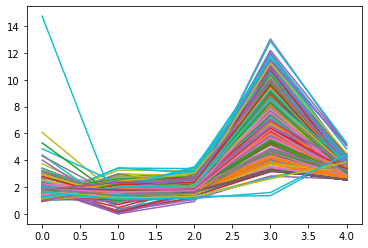

In [24]:
plt.plot(np.array(to_plot).T)

In [25]:
print(len(files))

92


In [35]:
np.shape(to_plot)

(460, 5)

In [43]:
conv1_results = []
for ii in range(0,460, 5):
    print(ii)
    conv1_results.append(to_plot[ii])
    print(to_plot[ii])


0
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
5
[1.8734767, 1.8087752, 1.6499112, 3.2528708, 2.5550632]
10
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
15
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
20
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
25
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
30
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
35
[1.8734767, 1.8087752, 1.6499112, 3.2528708, 2.5550632]
40
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
45
[1.8734767, 1.8087752, 1.6499112, 3.2528708, 2.5550632]
50
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
55
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
60
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
65
[1.8734767, 1.8087752, 1.6499112, 3.2528708, 2.5550632]
70
[1.8734767, 1.8087752, 1.6499112, 3.2528708, 2.5550632]
75
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
80
[1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]
85
[1.87347

In [41]:
final = []
final_err = []
for jj in range(1,5):
    conv_results = []
    for ii in range(jj,460, 5):
        conv_results.append(to_plot[ii])
    
    final.append(np.mean(np.array(conv_results), axis=0))
    final_err.append(np.std(np.array(conv_results), axis=0)/np.sqrt(len(conv_results)))



1
[1.8766414, 1.7430917, 1.785933, 4.309787, 2.7112935]
6
[3.136917, 1.3524362, 2.2920306, 8.497768, 2.9254365]
11
[1.8547176, 1.7763081, 1.8523891, 4.854232, 2.8120751]
16
[2.1384144, 1.319109, 2.0765672, 9.73054, 2.8604999]
21
[1.1751789, 1.8663656, 1.8396903, 6.0937004, 2.8263192]
26
[2.1228688, 1.6704844, 1.8887966, 8.304169, 2.8223948]
31
[1.842924, 1.7450076, 1.8450356, 6.760828, 3.0990105]
36
[1.382992, 1.715895, 2.0256352, 5.103178, 2.7977219]
41
[0.9356945, 1.9137113, 1.9165561, 6.1679816, 2.7693715]
46
[1.1616999, 2.8634493, 1.7508326, 6.8327923, 2.8903844]
51
[1.7421811, 2.339543, 1.7620233, 4.263258, 2.7075195]
56
[1.6276922, 1.6664493, 1.8036797, 6.3423796, 2.978925]
61
[1.895414, 1.9049816, 1.998833, 6.5273623, 3.0286644]
66
[1.8459337, 2.5064545, 2.1693401, 6.642086, 2.832045]
71
[1.8971212, 1.5318696, 1.6307716, 3.314405, 2.5618074]
76
[1.8384247, 2.1138, 2.0902536, 7.140302, 2.9066827]
81
[2.2210639, 1.7424147, 2.0494988, 6.7721357, 2.8098044]
86
[1.3776522, 1.838304, 

In [40]:
np.mean(np.array(conv2_results), axis=0)
print(np.std(np.array(conv2_results), axis=0)/np.sqrt(len(conv2_results)))

[0.04320766 0.03226242 0.02162212 0.17649458 0.01027945]


In [42]:
print(final)

[array([1.7836007, 1.814935 , 1.9160818, 6.3249106, 2.8235493],
      dtype=float32), array([1.7891151, 1.7623893, 2.090486 , 7.808823 , 3.1586645],
      dtype=float32), array([1.8198161, 1.6387243, 2.066938 , 8.390465 , 3.5135508],
      dtype=float32), array([1.9785392, 1.5398651, 2.0307238, 8.561792 , 3.8987026],
      dtype=float32)]


In [44]:
ff = [1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]

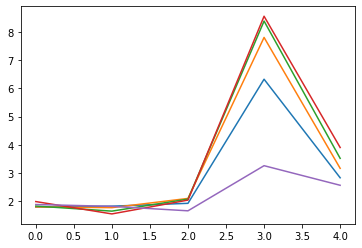

In [47]:
plt. plot(np.array(final).T)
plt.plot(ff)

In [3]:
def prettifyAxes(ax):
   ax.patch.set_visible(False)
   ax.spines['right'].set_visible(False)
   ax.spines['top'].set_visible(False)

   # ax.spines['bottom'].set_visible(False)
   plt.tick_params(axis='y',direction='out', right=False)
   plt.tick_params(axis='x',direction='out', top=False)

In [4]:
import configs

ModuleNotFoundError: No module named 'seaborn'

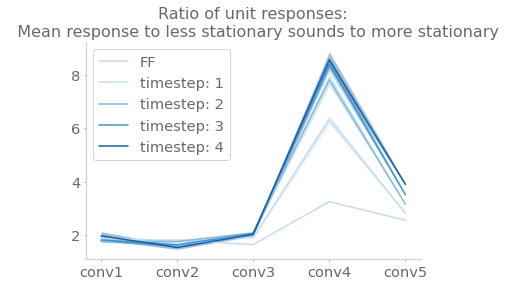

In [64]:
alpha, lw = 0.4, 5
fig, ax = plt.subplots()
colors = cm.get_cmap('Blues_r')(np.linspace(0.,0.75,5))
plt.plot(ff, label = 'FF', color = colors[4])


for ii, entry in enumerate(final):
   
    plt.plot(entry, label = 'timestep: '+str(ii+1), color = colors[4-ii])
    plt.fill_between(
        range(5), entry + final_err[ii],
        entry - final_err[ii],
        color=colors[4-ii], lw=0, alpha=alpha
        )
    plt.xticks(range(5), ['conv1', 'conv2', 'conv3', 'conv4', 'conv5'])
    plt.legend()
    plt.title('Ratio of unit responses:\n  Mean response to less stationary sounds to more stationary')
    prettifyAxes(ax)
    
    plt.savefig("FGBG.png", dpi=300)

In [58]:
print(final[0])

[1.7836007 1.814935  1.9160818 6.3249106 2.8235493]


In [59]:
print(final_err[0])

[0.04320766 0.03226242 0.02162212 0.17649458 0.01027945]


In [5]:
ff = [1.8734767, 1.8088856, 1.6501799, 3.253277, 2.5572019]

In [10]:
import configs

ModuleNotFoundError: No module named 'seaborn'

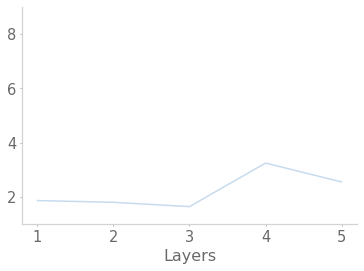

In [17]:
alpha, lw = 0.4, 5
fig, ax = plt.subplots()
colors = cm.get_cmap('Blues_r')(np.linspace(0.,0.75,5))



   
plt.plot(ff, color = colors[4])

plt.xticks(range(5), ['1', '2', '3', '4', '5'])

#plt.title('Ratio of unit responses:\n  Mean response to less stationary sounds to more stationary')
plt.ylim(1,9)
plt.xlabel('Layers')
prettifyAxes(ax)

plt.savefig("FGBG_JustFF.png", dpi=300)